<a href="https://colab.research.google.com/github/jyasyeer/garment-productivity-recomendation/blob/main/FinalProject_CAKAP_MUHAMMAD_JASIR_NABIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/2024/Studi Independen_cakap/Final Project/garments_worker_productivity.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# **Data Collection and data undestanding**

## Melihat isi data

In [ ]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
numerical = data.select_dtypes(include=[np.number])
numerical.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [ ]:
descriptive_stats = data.describe()
# Menampilkan hasil
descriptive_stats

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## melihat distribusi nilai kategori

In [ ]:
# Distribusi nilai untuk kolom kategori
category_distribution = data.describe(include=['object'])
category_distribution

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [ ]:
data.department.value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

## Mengecek unique value

In [ ]:
unique_values = data.nunique()
unique_values

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

## **Soal nomor 1**

### **a. Cek struktur dan dimensi dari data**


In [ ]:
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
data.shape

(1197, 15)

###  **b. cek apakah ada nilai yang hilang**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### **c. cek imbalance data**

In [ ]:
# Check for imbalance in the target variable
target_distribution = (
    data['targeted_productivity'].value_counts()
    if 'targeted_productivity' in data.columns
    else 'Target variable not found.'
)
target_distribution


targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

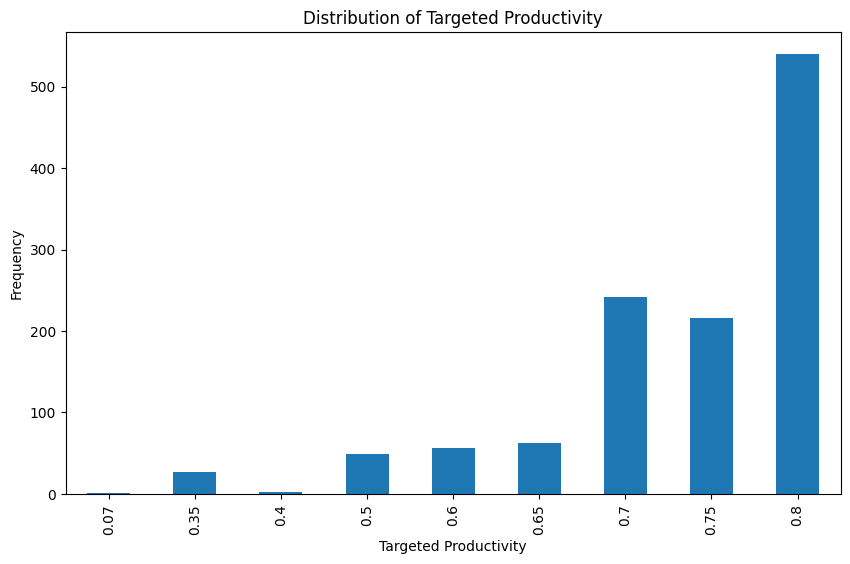

In [ ]:
# Plot distribution of targeted_productivity
plt.figure(figsize=(10, 6))
data['targeted_productivity'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.show()

Sebagian besar data terkonsentrasi pada nilai 0.80, 0.7, dan 0.75, sementara nilai lainnya memiliki jumlah data yang sangat sedikit. Ini menciptakan distribusi yang sangat tidak merata, yang bisa menyebabkan model prediksi lebih cenderung memprediksi kategori yang dominan dan kurang akurat untuk kategori yang jarang.

# **Data Cleaning**

## **mengecek missing value**

In [ ]:
missing_values = data.isnull().sum()
missing_values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

terdapat nilai null pada kolom 'wip' kolom ini berfungsi untuk menampilkan jumlah barang yang belum selesai dikerjakan. saya berasumsi jika nilai wip kosong maka tidak ada barang yang belum selesai dikerjakan. jadi saya akan mengisi nilai null tersebut dengan nilai 0

## Mengubah nilai NULL pada WIP

In [ ]:
# Filter rows with null values in `wip`
null_wip_rows = data[data['wip'].isnull()]
null_wip_rows

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
# Mengisi missing values pada kolom 'wip' dengan 0
data['wip'].fillna(0, inplace=True)

In [ ]:
# Memeriksa kembali apakah masih ada missing values pada kolom 'wip'
missing_values_wip_after = data['wip'].isnull().sum()
missing_values_wip_after

0

In [ ]:
# Menampilkan nilai 'wip' yang sebelumnya null dan telah diisi dengan 0
wip_null_filled = data[data['wip'] == 0]
wip_null_filled

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,0.0,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,0.0,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


## **Mengubah tipe data dari 'no_of_workers' dari desimal ke integer**

In [ ]:
# Check the unique values in 'no_of_workers' to identify any decimal values
unique_workers = data['no_of_workers'].unique()
unique_workers

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

seharusnya jumlah pekerja tidak boleh bersifat desimal dan harus berupa integer karena jumlah orang dalam tiap tim tidak boleh bersifat desimal

In [ ]:
# Identify rows with decimal values in 'no_of_workers'
decimal_workers = data[data['no_of_workers'] % 1 != 0]
decimal_workers_count = decimal_workers.shape[0]

decimal_workers_count

140

In [ ]:
# Correcting the 'no_of_workers' by rounding to the nearest integer
data['no_of_workers'] = data['no_of_workers'].round().astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# Verify the correction
unique_workers_after = data['no_of_workers'].unique()
unique_workers_after

array([59,  8, 30, 56, 58, 55, 54, 18, 60, 12, 20, 17, 32, 31, 10, 16, 15,
        5, 57, 53, 52,  2,  9,  7, 19, 28, 34, 89, 14, 25,  4, 21, 35, 51,
       33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,  6])

## **Mengubah tipe data pada kolom 'date'  menjadi tipe data datetime dari yang sebelumnya object:**

In [ ]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## Handle duplikasi data

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Length: 1197, dtype: bool

In [ ]:
# Find duplicates in `df_raw`
duplicate_rows = data[data.duplicated()]
duplicate_rows

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


## menggabungkan 'finishing ' dan 'finisihing'

In [ ]:
data.department.value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [ ]:
data=data.replace(['finishing '], ['finishing'])
data.department.value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

Tidak terdapat data yang duplikat

 # **EDA(exploratory Data Analysis)**

## Heatmap

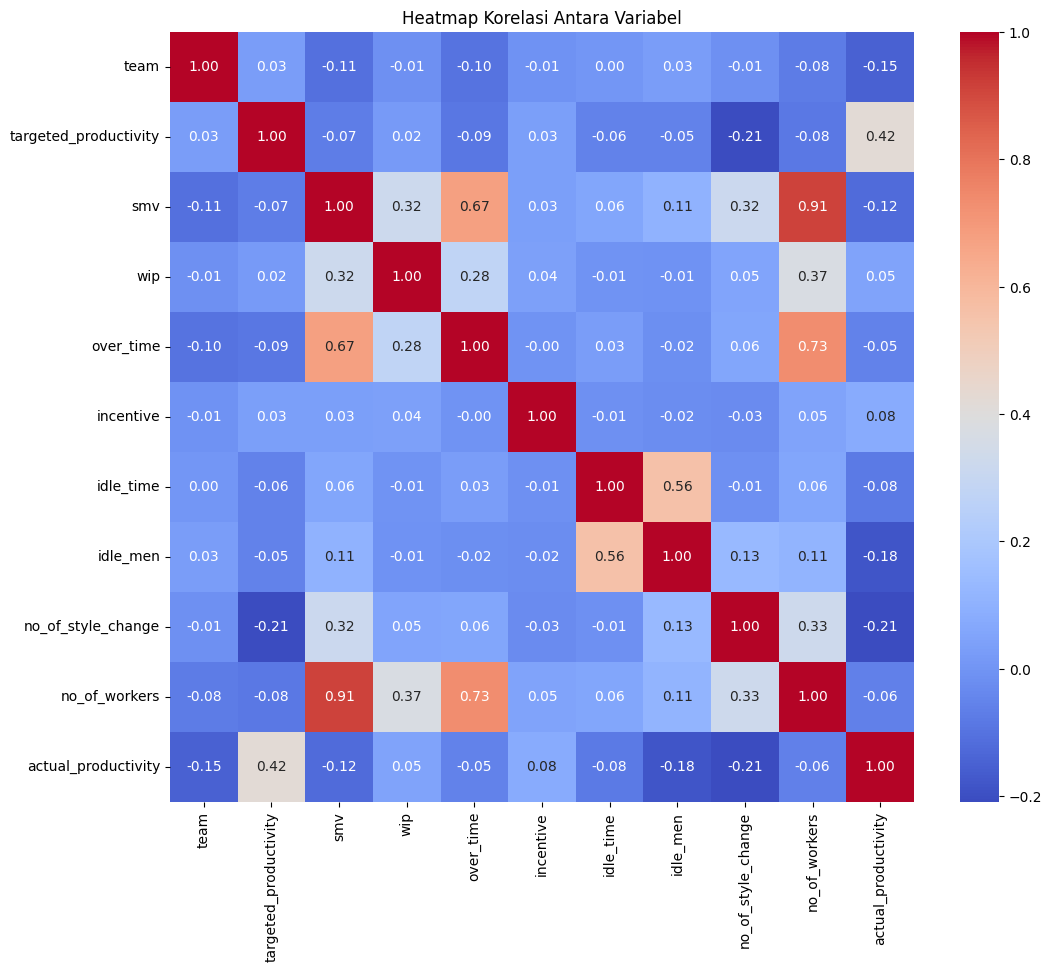

In [ ]:
# Memilih hanya kolom numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Membuat heatmap untuk melihat korelasi antara semua variabel numerik dalam dataset
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

## **Soal nomor 2**

analisis sederhana pada pada data untuk mencari hubungan antara variabel target dengan prediktor yang lainnya

### **a.day vs actual_productivity**

<ipython-input-194-601d7bfa90c4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='day', y='actual_productivity', ci=None)


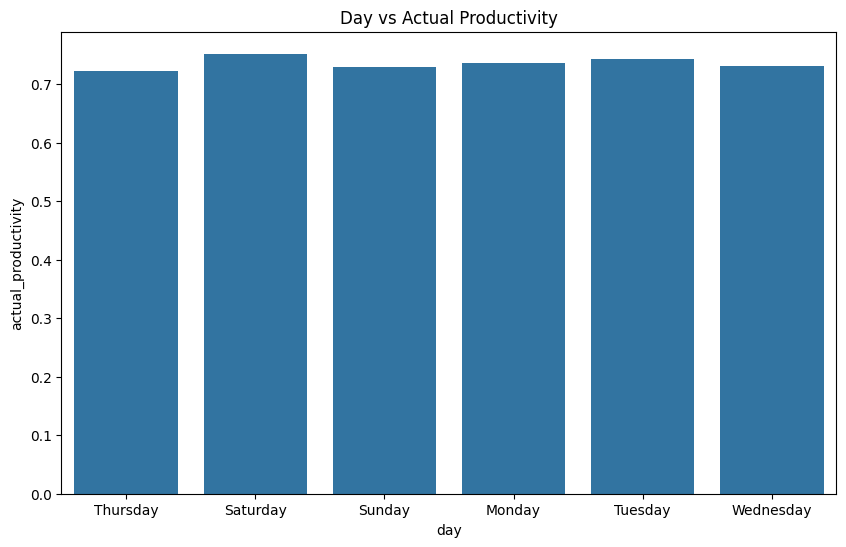

In [ ]:
# Day vs Actual Productivity using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='day', y='actual_productivity', ci=None)
plt.title('Day vs Actual Productivity')
plt.show()

Distribusi produktivitas aktual cukup seragam di seluruh hari kerja, tidak menunjukkan variasi produktivitas yang signifikan.


### **b. quarter vs actual_productivity**


<ipython-input-195-428d8350cb8f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='quarter', y='actual_productivity', ci=None)


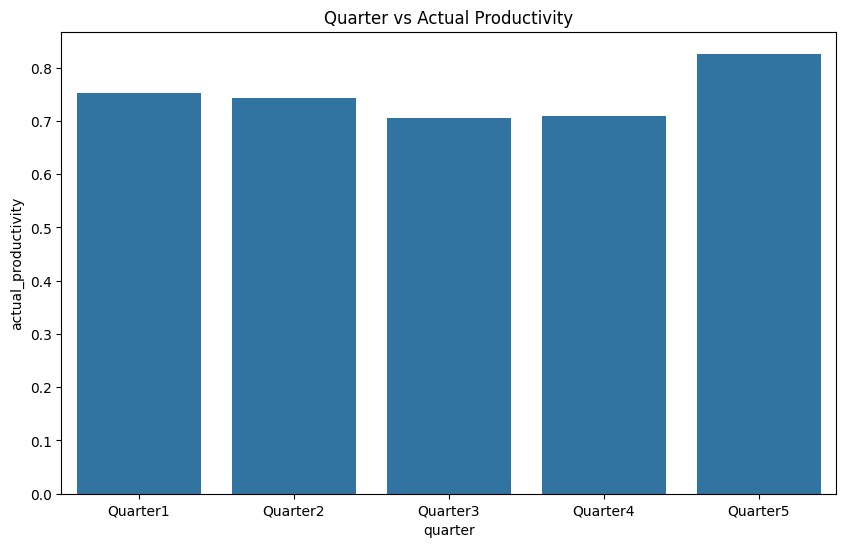

In [ ]:
# Quarter vs Actual Productivity using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='quarter', y='actual_productivity', ci=None)
plt.title('Quarter vs Actual Productivity')
plt.show()


Produktivitas aktual tidak menunjukkan variasi signifikan di antara kuartal 1-4, menunjukkan bahwa kuartal tersebut tidak memiliki dampak besar terhadap produktivitas buruh. akan tetapi, pada kuartal ke 5 terjadi peningkatan yang cukup signifikan

### **c. department vs actual_productivity**

In [ ]:
# Check unique values in the 'department' column to identify inconsistencies
unique_departments = data['department'].unique()

unique_departments

array(['sweing', 'finishing'], dtype=object)

terdapat keliruan pada penginputan data karena seharusnya hanya ada 2 departemen akan tetapi pada departemen 'finishing' ada yang ditulis dengan menggunakan spasi dan ada yang tidak menggunakan spasi

<ipython-input-197-0a3e4d35e588>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='department', y='actual_productivity', ci=None)


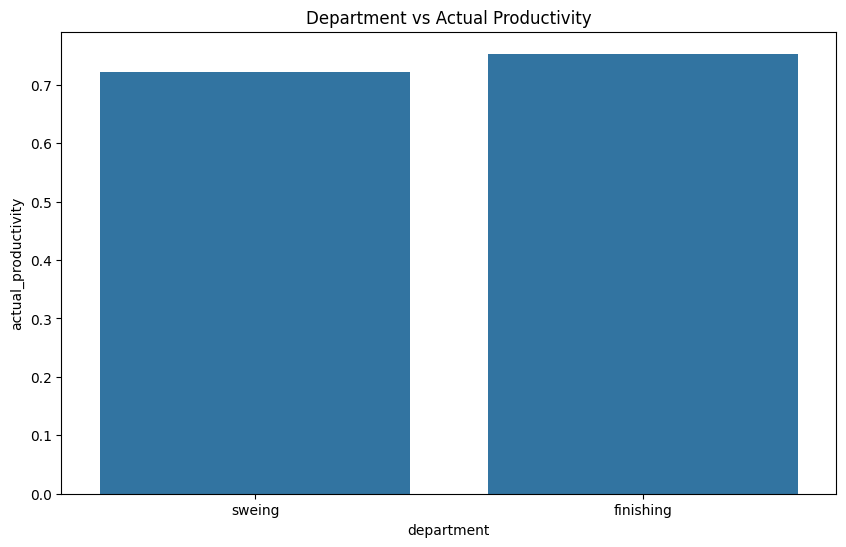

In [ ]:
# Department vs Actual Productivity using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='department', y='actual_productivity', ci=None)
plt.title('Department vs Actual Productivity')
plt.show()

Terdapat perbedaan yang tidak signifikan antara departemen.Departemen "finishing" memiliki produktivitas yang lebih besar dibandingkan dengan departemen "sweing".Ini menunjukkan bahwa departemen "finishing" mungkin memiliki lebih banyak faktor yang mempengaruhi produktivitas, dibandingkan dengan 'sweing'. faktor tersebut bisa saja berupa tingkat kesulitan dalam pekerjaan, atau faktor-faktor lainnya

### **d.Number of Workers vs Actual Productivity**


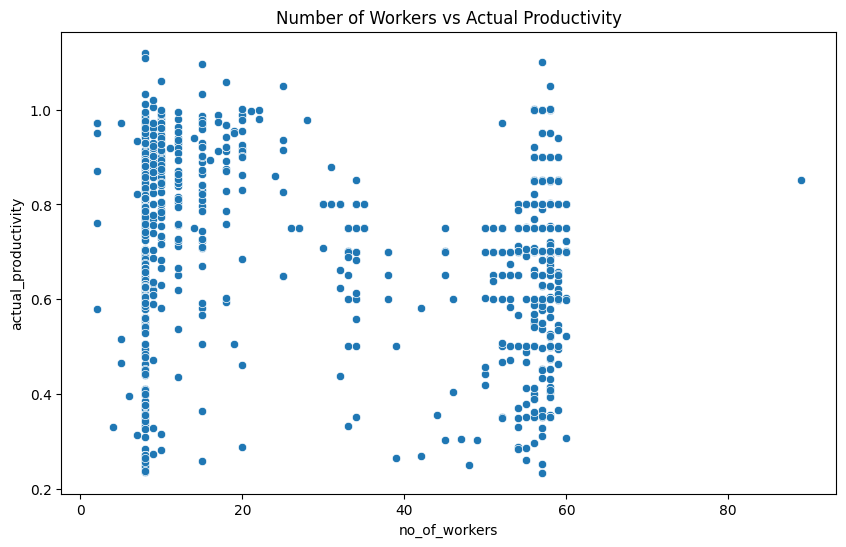

In [ ]:
# Number of Workers vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='no_of_workers', y='actual_productivity')
plt.title('Number of Workers vs Actual Productivity')
plt.show()


Scatter plot ini menunjukkan bahwa produktivitas aktual tidak secara langsung berkorelasi dengan jumlah pekerja. Meskipun ada variasi dalam produktivitas di berbagai tingkat jumlah pekerja, tidak ada tren yang jelas yang menunjukkan bahwa peningkatan atau penurunan jumlah pekerja akan selalu mempengaruhi produktivitas secara signifikan. Hal ini menunjukkan bahwa faktor-faktor lain selain jumlah pekerja mungkin lebih berpengaruh dalam menentukan produktivitas aktual.

### **e. Number of Style Changes vs Actual Productivity**

<ipython-input-199-7111fbfabca6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='no_of_style_change', y='actual_productivity', ci=None)


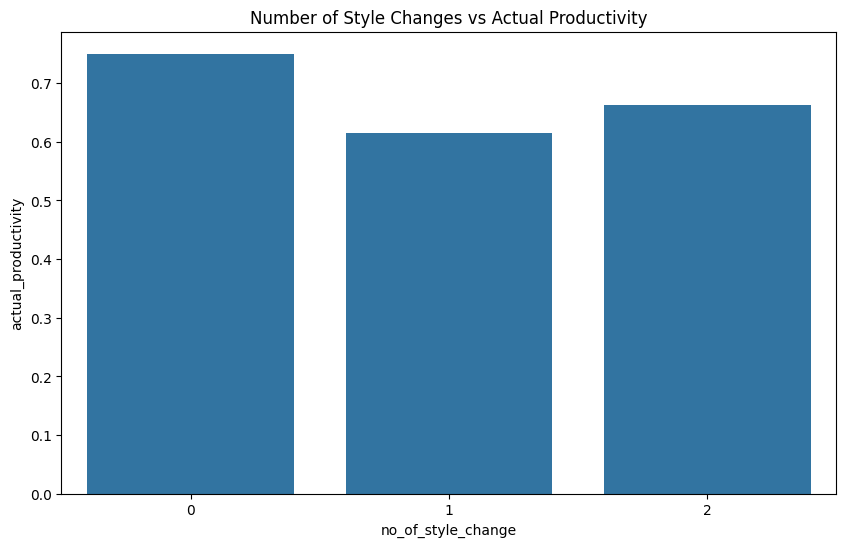

In [ ]:
# Number of Style Changes vs Actual Productivity using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='no_of_style_change', y='actual_productivity', ci=None)
plt.title('Number of Style Changes vs Actual Productivity')
plt.show()

Bar chart yang menunjukkan hubungan antara jumlah perubahan desain produk (number_of_style_changes) dan produktivitas aktual (actual_productivity) mengindikasikan bahwa stabilitas dalam desain mendukung produktivitas yang lebih tinggi. Rata-rata produktivitas tertinggi tercapai saat tidak ada perubahan desain (sekitar 0.7), menurun saat ada satu perubahan desain (sekitar 0.65), dan tetap lebih rendah dengan dua perubahan desain (sekitar 0.62). Ini menunjukkan bahwa perubahan desain mengganggu alur kerja dan mengurangi produktivitas. Oleh karena itu, menjaga konsistensi dalam desain produk dapat membantu mempertahankan atau meningkatkan produktivitas pekerja.

### **F&G. Targeted Productivity vs Actual Productivity**

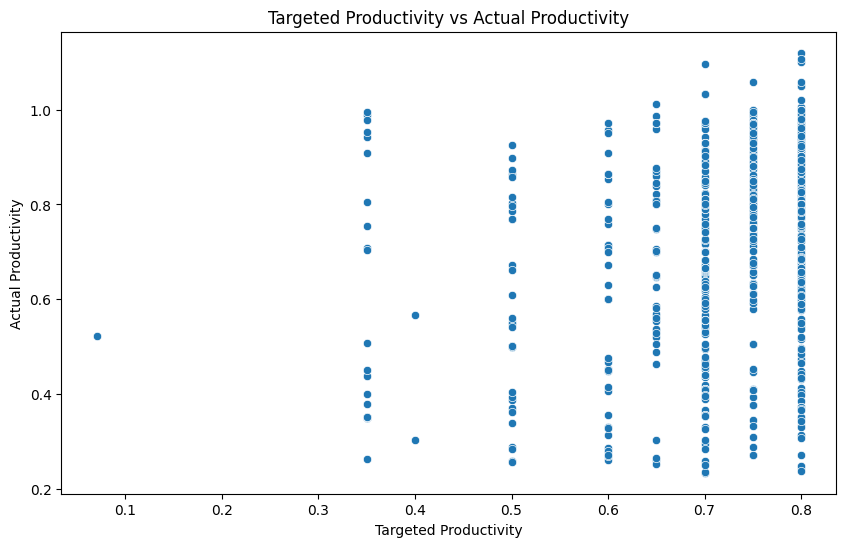

In [ ]:
# Scatter plot untuk melihat hubungan antara targeted_productivity dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=data)
plt.title('Targeted Productivity vs Actual Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.show()

Scatter plot menunjukkan hubungan antara target_produktivitas dan produktivitas_aktual. Terdapat tren positif antara kedua variabel ini, artinya ketika target_produktivitas meningkat, produktivitas_aktual cenderung meningkat juga.

<ipython-input-201-49458dd8ad0d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='targeted_productivity', y='actual_productivity', ci=None)


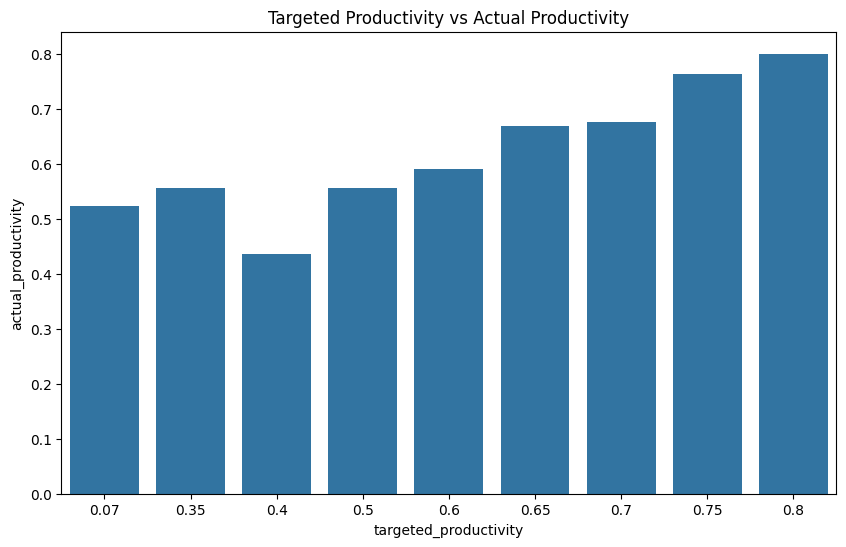

In [ ]:
# Targeted Productivity vs Actual Productivity using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='targeted_productivity', y='actual_productivity', ci=None)
plt.title('Targeted Productivity vs Actual Productivity')
plt.show()

hubungan antara produktivitas yang ditargetkan (targeted_productivity) dan produktivitas aktual (actual_productivity) mengindikasikan adanya korelasi positif antara keduanya. Produktivitas aktual cenderung meningkat seiring dengan peningkatan target produktivitas, dengan produktivitas tertinggi tercapai pada target 0.80. Namun, target produktivitas rendah seperti 0.40 menunjukkan produktivitas aktual yang lebih rendah. Meskipun ada tren positif, variabilitas dalam produktivitas aktual menunjukkan bahwa faktor lain juga mempengaruhi hasil akhir. Oleh karena itu, menetapkan target yang lebih tinggi dapat membantu meningkatkan produktivitas, tetapi perlu memperhatikan faktor-faktor tambahan untuk memastikan pencapaian yang konsisten.

### H.smv vs actual_productivity

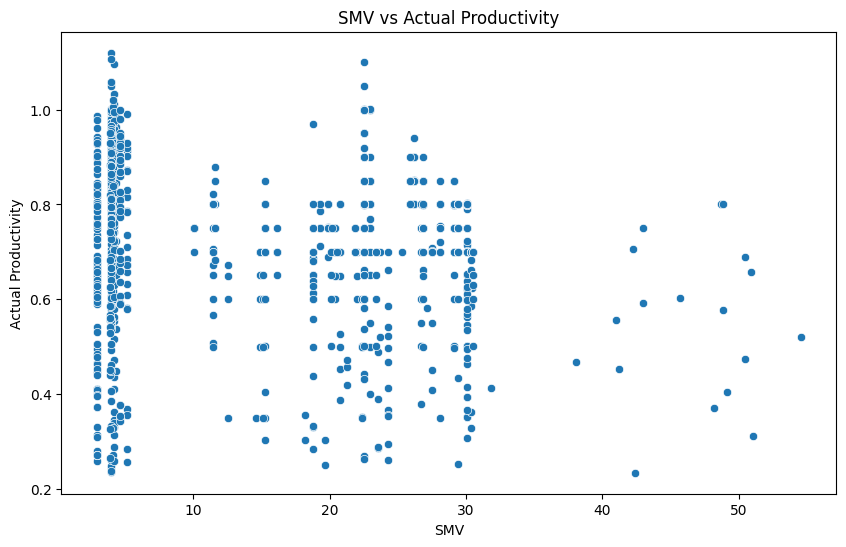

In [ ]:
# Scatter plot untuk melihat hubungan antara smv dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', data=data)
plt.title('SMV vs Actual Productivity')
plt.xlabel('SMV')
plt.ylabel('Actual Productivity')
plt.show()

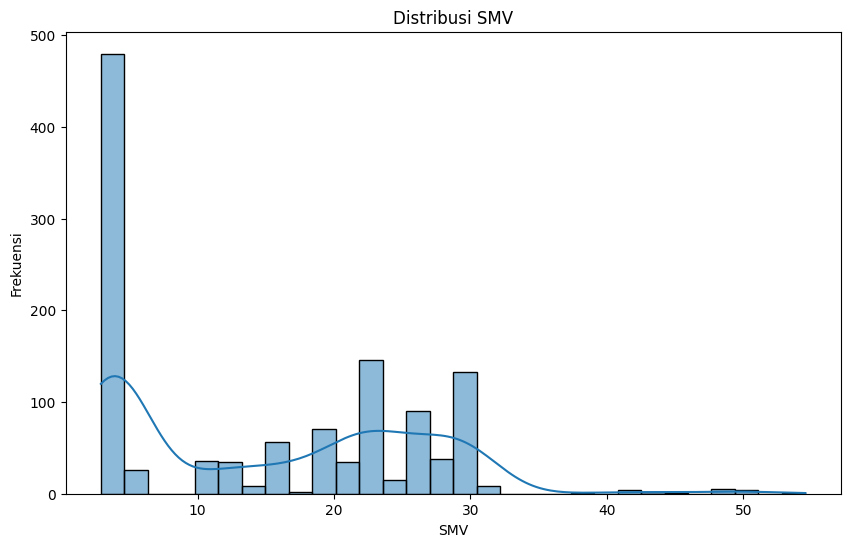

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['smv'], bins=30, kde=True)
plt.title('Distribusi SMV')
plt.xlabel('SMV')
plt.ylabel('Frekuensi')
plt.show()

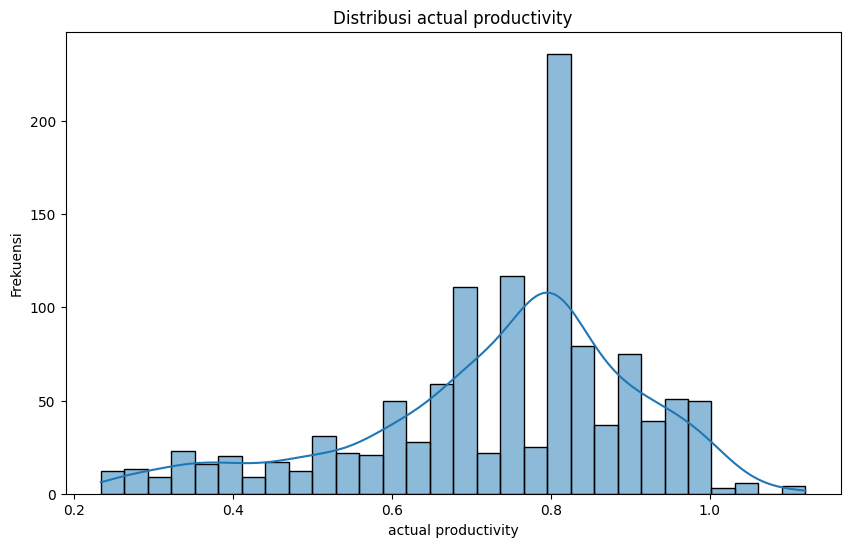

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_productivity'], bins=30, kde=True)
plt.title('Distribusi actual productivity')
plt.xlabel('actual productivity')
plt.ylabel('Frekuensi')
plt.show()

Dari histogram, terlihat bahwa distribusi smv memiliki beberapa nilai yang sering muncul, sedangkan distribusi actual_productivity lebih merata.

Scatter plot antara smv dan actual_productivity menunjukkan bahwa tidak ada hubungan yang jelas antara kedua variabel tersebut. Hal ini mengindikasikan bahwa smv bukanlah satu-satunya faktor yang mempengaruhi actual_productivity.

### I.wip vs actual_productivity

In [ ]:
# Calculate descriptive statistics
desc_stats_wip = data['wip'].describe().round(3)
desc_stats_actual = data['actual_productivity'].describe().round(3)

print("Statistik Deskriptif WIP:")
print(desc_stats_wip.to_markdown(numalign="left", stralign="left"))

print("\nStatistik Deskriptif Actual Productivity:")
print(desc_stats_actual.to_markdown(numalign="left", stralign="left"))

# Print number of unique values
print("\nJumlah Nilai Unik WIP:", data['wip'].nunique())
print("Jumlah Nilai Unik Actual Productivity:", data['actual_productivity'].nunique())

Statistik Deskriptif WIP:
|       | wip     |
|:------|:--------|
| count | 1197    |
| mean  | 687.228 |
| std   | 1514.58 |
| min   | 0       |
| 25%   | 0       |
| 50%   | 586     |
| 75%   | 1083    |
| max   | 23122   |

Statistik Deskriptif Actual Productivity:
|       | actual_productivity   |
|:------|:----------------------|
| count | 1197                  |
| mean  | 0.735                 |
| std   | 0.174                 |
| min   | 0.234                 |
| 25%   | 0.65                  |
| 50%   | 0.773                 |
| 75%   | 0.85                  |
| max   | 1.12                  |

Jumlah Nilai Unik WIP: 549
Jumlah Nilai Unik Actual Productivity: 879


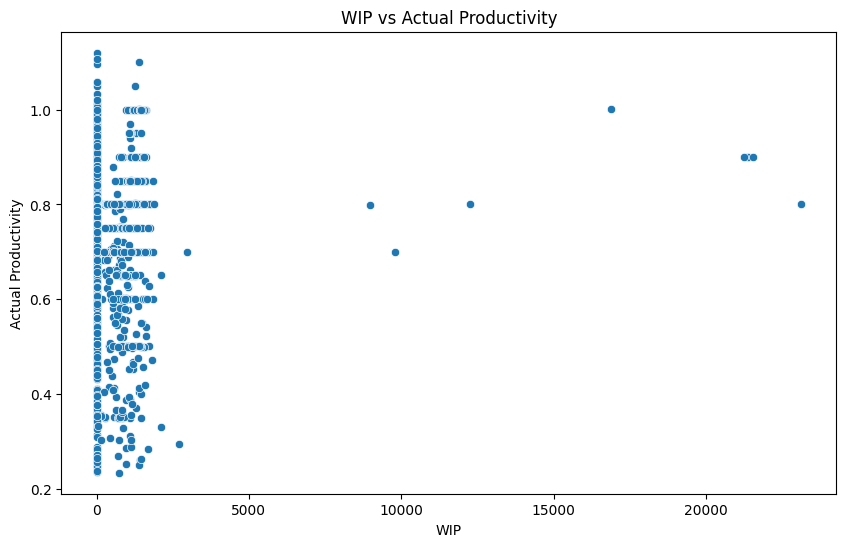

In [ ]:
# Scatter plot untuk melihat hubungan antara wip dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wip', y='actual_productivity', data=data)
plt.title('WIP vs Actual Productivity')
plt.xlabel('WIP')
plt.ylabel('Actual Productivity')
plt.show()

 terlihat bahwa rata-rata wip adalah 687.228, sedangkan rata-rata actual_productivity adalah 0.735. Distribusi nilai wip sangat bervariasi terlihat dari nilai standar deviasi yang sangat besar (1514.58).

Dari scatterplot, terlihat bahwa distribusi wip memiliki banyak nilai 0 dan beberapa nilai yang sangat besar, sedangkan distribusi actual_productivity lebih merata.

### J.over_time vs actual_productivity

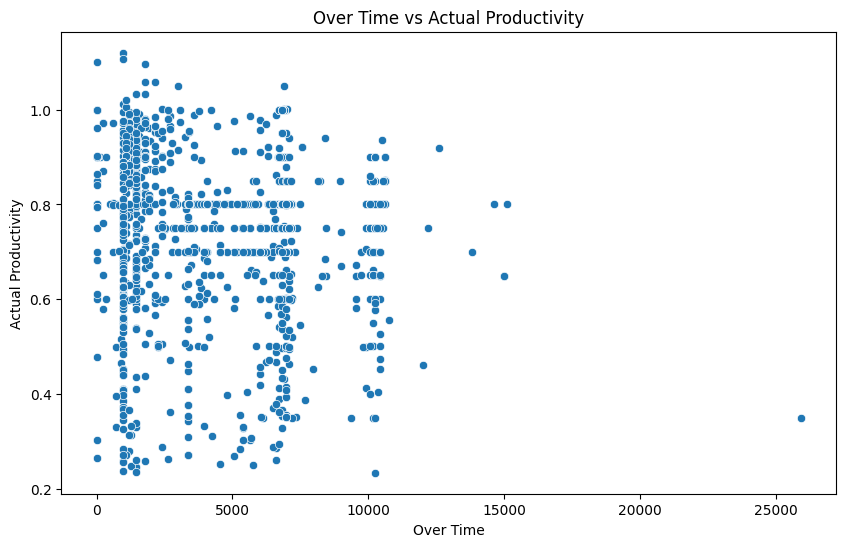

In [ ]:
# Scatter plot untuk melihat hubungan antara over_time dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='over_time', y='actual_productivity', data=data)
plt.title('Over Time vs Actual Productivity')
plt.xlabel('Over Time')
plt.ylabel('Actual Productivity')
plt.show()

Gambar scatter plot yang menunjukkan hubungan antara 'over_time' dan 'actual_productivity' mengungkapkan beberapa hal penting. Sebagian besar data terpusat di sekitar nilai 'over_time' yang relatif rendah (0 hingga sekitar 5000 menit), dengan beberapa outliers yang menunjukkan waktu lembur sangat tinggi (di atas 15000 menit). Nilai 'actual_productivity' bervariasi antara 0.2 hingga 1.0, dengan banyak titik yang menunjukkan produktivitas tinggi bahkan pada nilai 'over_time' yang rendah. Tidak ada pola linier yang jelas antara 'over_time' dan 'actual_productivity', menandakan bahwa produktivitas aktual tidak menunjukkan peningkatan atau penurunan yang konsisten dengan peningkatan waktu lembur. Sebaliknya, produktivitas aktual menunjukkan banyak variasi pada berbagai tingkat 'over_time', mengindikasikan bahwa faktor lain mungkin lebih berpengaruh terhadap produktivitas aktual. Kesimpulannya, scatter plot ini menunjukkan bahwa tidak ada korelasi yang signifikan antara 'over_time' dan 'actual_productivity', dan variabilitas tinggi dalam produktivitas aktual pada berbagai tingkat waktu lembur.

### K. incentive vs actual_productivity

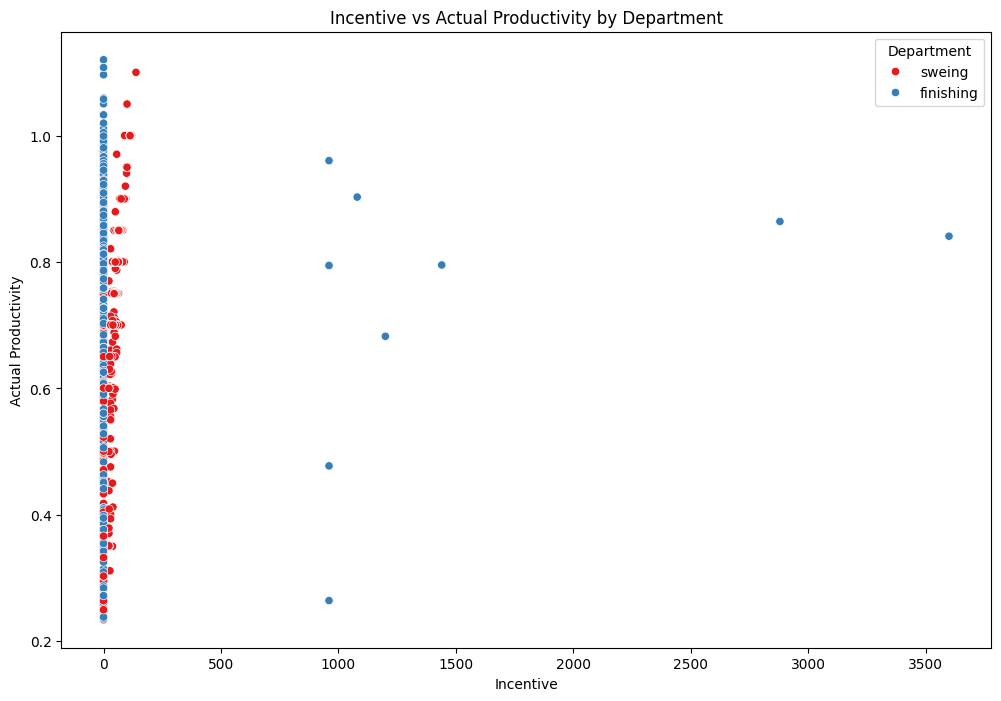

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='incentive', y='actual_productivity', hue='department', data=data, palette='Set1')
plt.title('Incentive vs Actual Productivity by Department')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.legend(title='Department')
plt.show()

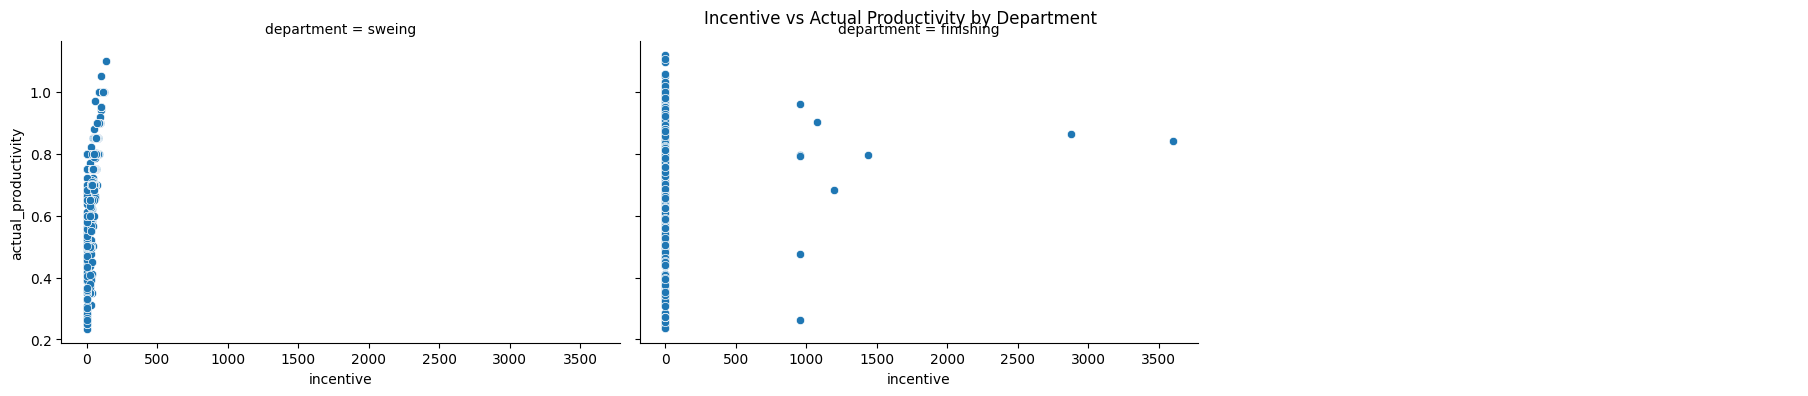

In [ ]:

# Membuat FacetGrid untuk melihat hubungan antara incentive dan actual_productivity berdasarkan departemen
g = sns.FacetGrid(data, col="department", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "incentive", "actual_productivity")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Incentive vs Actual Productivity by Department')
plt.show()

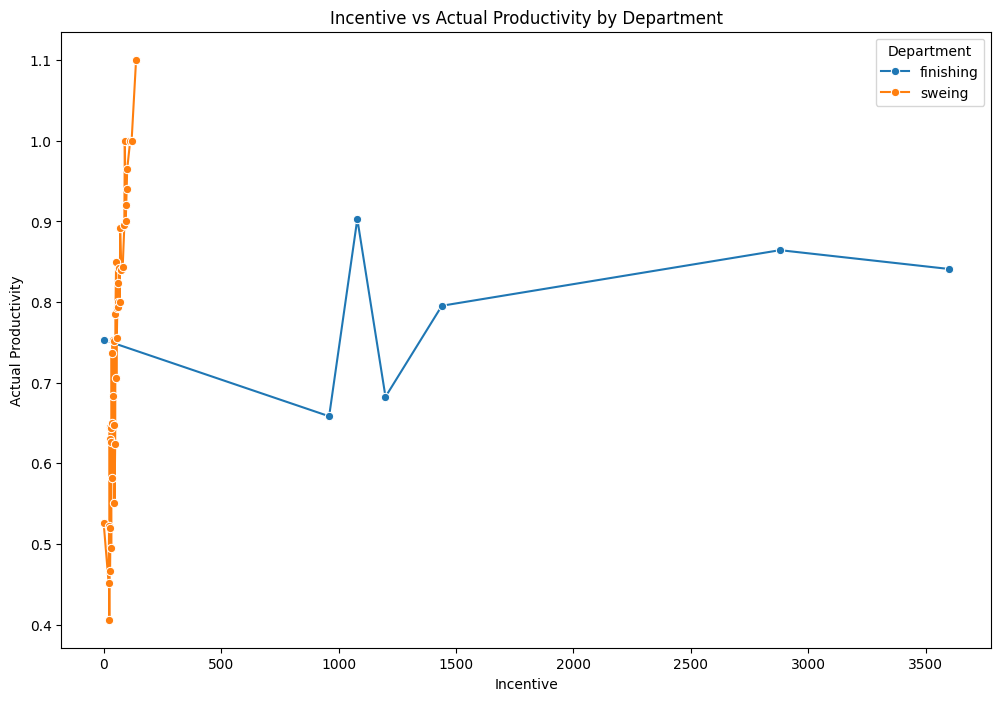

In [ ]:
# Menghitung rata-rata produktivitas aktual untuk setiap tingkat insentif dan departemen
avg_productivity = data.groupby(['incentive', 'department'])['actual_productivity'].mean().reset_index()

# Membuat line chart untuk melihat hubungan antara incentive dan actual_productivity berdasarkan departemen
plt.figure(figsize=(12, 8))
sns.lineplot(x='incentive', y='actual_productivity', hue='department', data=avg_productivity, marker='o')
plt.title('Incentive vs Actual Productivity by Department')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.legend(title='Department')
plt.show()

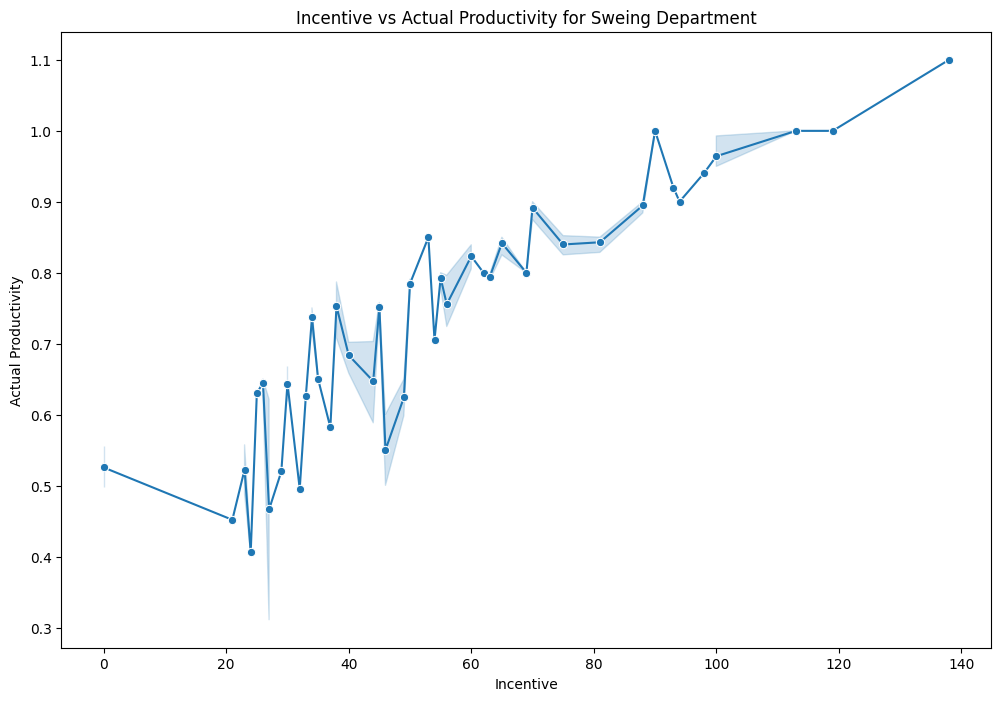

In [ ]:
# Memfilter data untuk departemen 'sweing'
sweing_data = data[data['department'] == 'sweing']

# Menghitung rata-rata produktivitas aktual untuk setiap tingkat insentif dalam departemen 'sweing'
avg_sweing_productivity = sweing_data.groupby('incentive')['actual_productivity'].mean().reset_index()

# Membuat line chart untuk melihat hubungan antara incentive dan actual_productivity dalam departemen 'sweing'
plt.figure(figsize=(12, 8))
sns.lineplot(x='incentive', y='actual_productivity', data=sweing_data, marker='o')
plt.title('Incentive vs Actual Productivity for Sweing Department')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.show()

Sebagian besar insentif yang diberikan berada pada tingkat rendah, dan variasi produktivitas aktual terlihat di seluruh rentang insentif. Meskipun ada beberapa insentif yang sangat tinggi, mereka tidak secara konsisten dikaitkan dengan produktivitas aktual yang lebih tinggi atau lebih rendah.

### L. idle_time vs actual_productivity


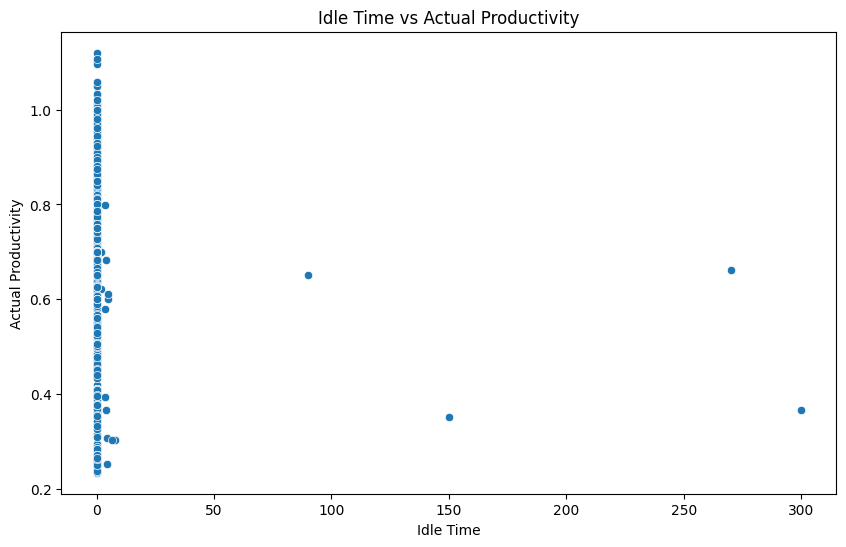

In [ ]:
# Scatter plot untuk melihat hubungan antara idle_time dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_time', y='actual_productivity', data=data)
plt.title('Idle Time vs Actual Productivity')
plt.xlabel('Idle Time')
plt.ylabel('Actual Productivity')
plt.show()

Scatter plot ini menunjukkan bahwa waktu idle memiliki dampak negatif terhadap produktivitas aktual. Produktivitas aktual cenderung lebih tinggi ketika waktu idle rendah, dan cenderung menurun ketika waktu idle meningkat. Hal ini menunjukkan bahwa mengurangi waktu idle dapat menjadi strategi efektif untuk meningkatkan produktivitas pekerja.

### M. idle_men vs actual_productivity

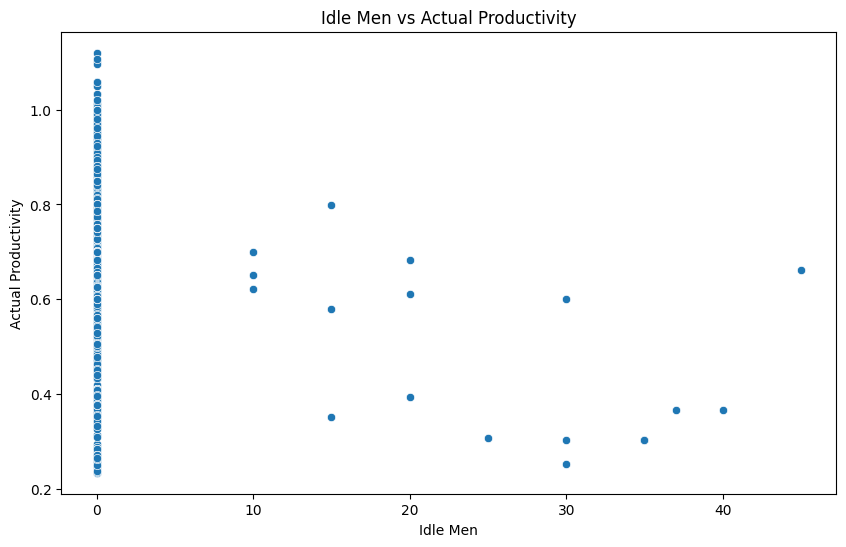

In [ ]:
# Scatter plot untuk melihat hubungan antara idle_men dan actual_productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_men', y='actual_productivity', data=data)
plt.title('Idle Men vs Actual Productivity')
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

Scatter plot ini menunjukkan bahwa jumlah pekerja idle memiliki dampak negatif terhadap produktivitas aktual. Produktivitas aktual cenderung lebih tinggi ketika jumlah pekerja idle rendah, dan cenderung menurun ketika jumlah pekerja idle meningkat. Hal ini menunjukkan bahwa mengurangi jumlah pekerja yang idle dapat menjadi strategi efektif untuk meningkatkan produktivitas pekerja.

## More Visualization

### Productivity Trends by Day of the Week

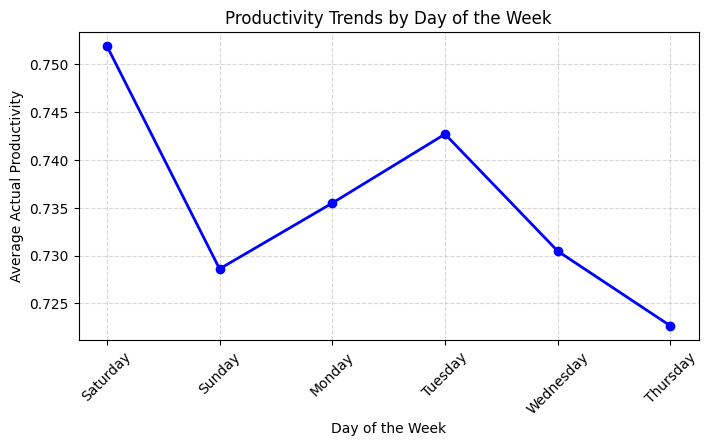

In [ ]:
# Convert the 'day' column to a categorical data type with the correct order
data['day'] = pd.Categorical(data['day'], categories=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], ordered=True)

# Calculate average productivity by day of the week
day_avg_productivity = data.groupby('day')['actual_productivity'].mean()

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a line plot with markers
plt.plot(day_avg_productivity.index, day_avg_productivity.values, marker='o', color='blue', linestyle='-', linewidth=2)

# Customize the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Actual Productivity')
plt.title('Productivity Trends by Day of the Week')
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the x-axis tick labels rotation for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Grafik ini menunjukkan bahwa produktivitas rata-rata pekerja bervariasi sepanjang minggu. Produktivitas tertinggi terjadi pada hari Sabtu, sementara produktivitas terendah terjadi pada hari Minggu dan Kamis. Tren ini bisa memberikan wawasan penting untuk manajemen dalam merencanakan jadwal kerja dan strategi untuk meningkatkan produktivitas. Misalnya, langkah-langkah untuk meningkatkan motivasi pekerja pada hari-hari dengan produktivitas rendah seperti Minggu dan Kamis dapat diambil untuk mencapai tingkat produktivitas yang lebih konsisten sepanjang minggu

### Productivity by Month

<ipython-input-215-c36d07f51f53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='actual_productivity', data=monthly_productivity, palette='viridis')


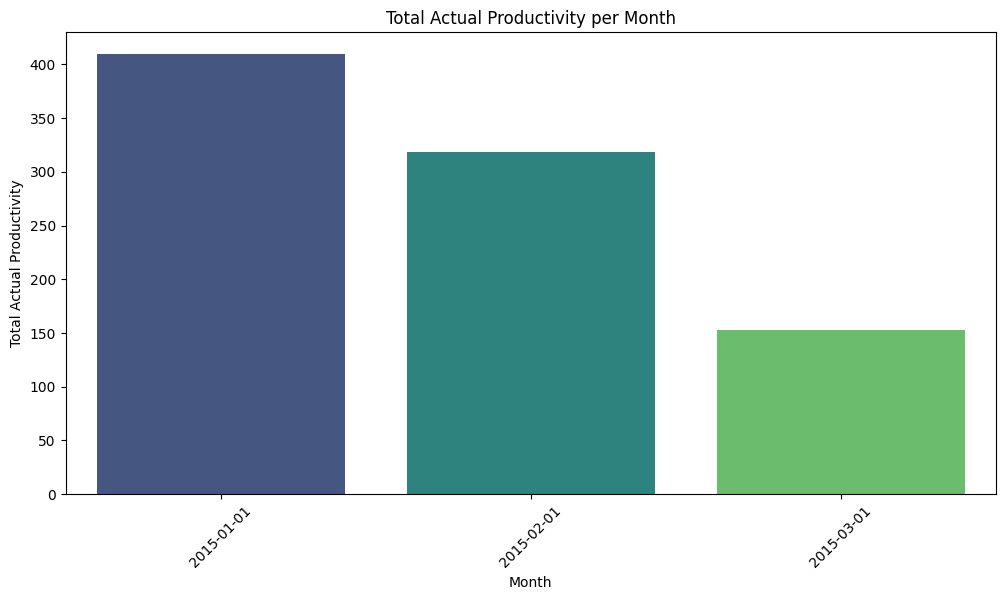

In [ ]:
# Menambahkan kolom 'month' untuk mengelompokkan berdasarkan bulan
data['month'] = data['date'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan dan menghitung total actual productivity
monthly_productivity = data.groupby('month')['actual_productivity'].sum().reset_index()

# Mengonversi kolom 'month' kembali ke datetime untuk visualisasi
monthly_productivity['month'] = monthly_productivity['month'].dt.to_timestamp()

# Membuat bar plot untuk total actual productivity per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='actual_productivity', data=monthly_productivity, palette='viridis')
plt.title('Total Actual Productivity per Month')
plt.xlabel('Month')
plt.ylabel('Total Actual Productivity')
plt.xticks(rotation=45)
plt.show()

Grafik ini menunjukkan bahwa ada variasi dalam total produktivitas aktual pekerja setiap bulan. Januari 2015 memiliki produktivitas tertinggi, diikuti oleh penurunan di Februari 2015, dan penurunan lebih lanjut di Maret 2015. Faktor-faktor yang menyebabkan variasi ini bisa beragam, termasuk kemungkinan adanya perubahan dalam jumlah pekerjaan, waktu idle, jumlah pekerja, atau bahkan faktor eksternal lainnya.

# Modeling and Evaluation

## Remove Outlier

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

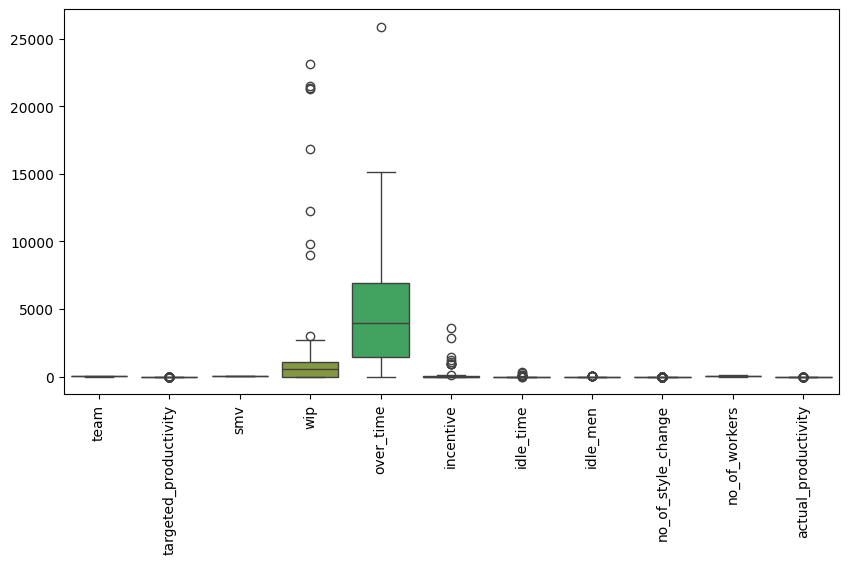

In [ ]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data =data, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [ ]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(data)}')

Jumlah Baris Sebelum Outlier Dihapus: 1197


In [ ]:
# Daftar kolom yang akan dihapus outliers-nya
columns_to_clean = ['wip', 'incentive', 'idle_time', 'idle_men','over_time']
# Fungsi untuk menghapus outliers menggunakan IQR
def remove_outliers(data, columns):
    for column in columns_to_clean:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)
        data = data[filter]
    return data

# Menghapus outliers
data_clean = remove_outliers(data, columns_to_clean)
data_clean

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725,2015-01
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500,2015-01
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570,2015-01
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570,2015-01
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628333,2015-03
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.625625,2015-03
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.625625,2015-03
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15,0.505889,2015-03


In [ ]:
print(f'Jumlah Baris Setelah Outlier Dihapus: {len(data_clean)}')

Jumlah Baris Setelah Outlier Dihapus: 1158


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

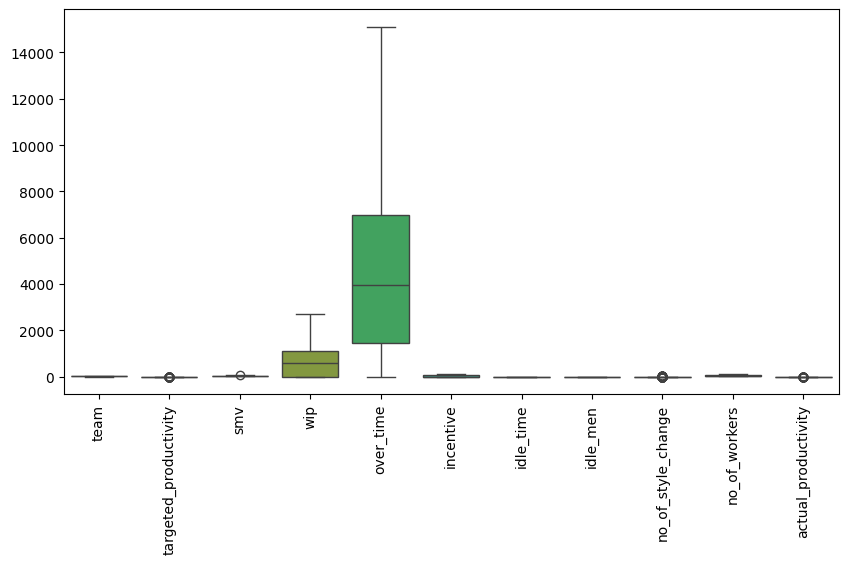

In [ ]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data =data_clean, orient ='v',width=0.8)
plt.xticks(rotation=90)

## Encoding

### One Hot Encoder

In [ ]:
# Menggunakan One-Hot Encoding pada kolom kategori
col = ['department', 'day', 'quarter']
for cat in col:
    onehots = pd.get_dummies(data_clean[col], prefix=cat)
    data_encoded = data_clean.join(onehots)

In [ ]:
data_encoded

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,quarter_Sunday,quarter_Monday,quarter_Tuesday,quarter_Wednesday,quarter_Thursday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,False,False,False,False,True,True,False,False,False,False
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,...,False,False,False,False,True,True,False,False,False,False
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,False,False,False,False,True,True,False,False,False,False
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,False,False,False,False,True,True,False,False,False,False
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,...,False,False,False,True,False,False,True,False,False,False
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,...,False,False,False,True,False,False,True,False,False,False
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,...,False,False,False,True,False,False,True,False,False,False
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
df = data_encoded.drop(['quarter', 'department', 'day'],axis=1)
df.head(5)

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Sunday,quarter_Monday,quarter_Tuesday,quarter_Wednesday,quarter_Thursday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5
0,2015-01-01,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,False,False,False,False,True,True,False,False,False,False
1,2015-01-01,1,0.75,3.94,0.0,960,0,0.0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,2015-01-01,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,True,True,False,False,False,False
3,2015-01-01,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,True,True,False,False,False,False
4,2015-01-01,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
#buat kolom baru untuk mencari target yang tercapai

# Create a new column to indicate if the target was achieved
df['target_achieved'] = df['actual_productivity'] >= df['targeted_productivity']

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1158 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1158 non-null   datetime64[ns]
 1   quarter                1158 non-null   object        
 2   department             1158 non-null   object        
 3   day                    1158 non-null   category      
 4   team                   1158 non-null   int64         
 5   targeted_productivity  1158 non-null   float64       
 6   smv                    1158 non-null   float64       
 7   wip                    1158 non-null   float64       
 8   over_time              1158 non-null   int64         
 9   incentive              1158 non-null   int64         
 10  idle_time              1158 non-null   float64       
 11  idle_men               1158 non-null   int64         
 12  no_of_style_change     1158 non-null   int64         
 13  no_of_wo

### Label Encoder

In [ ]:
# Create a new column to indicate if the target was achieved
data_clean['target_achieved'] = data_clean['actual_productivity'] >= data_clean['targeted_productivity']

# ditambahkan satu kolom baru untuk melihat target yang sudah dicapai pada setiap data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan DataFrame asli ke variabel baru
encoded_data = data_clean.copy()

# Menggunakan Label Encoding pada kolom kategori di variabel baru
label_encoders = {}
for column in ['department', 'day', 'quarter','target_achieved']:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le

print(encoded_data.head())

        date  quarter  department  day  team  targeted_productivity    smv  \
0 2015-01-01        0           1    3     8                   0.80  26.16   
1 2015-01-01        0           0    3     1                   0.75   3.94   
2 2015-01-01        0           1    3    11                   0.80  11.41   
3 2015-01-01        0           1    3    12                   0.80  11.41   
4 2015-01-01        0           1    3     6                   0.80  25.90   

      wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1108.0       7080         98        0.0         0                   0   
1     0.0        960          0        0.0         0                   0   
2   968.0       3660         50        0.0         0                   0   
3   968.0       3660         50        0.0         0                   0   
4  1170.0       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity    month  target_achieved  
0       

In [ ]:
encoded_data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,target_achieved
0,2015-01-01,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725,2015-01,1
1,2015-01-01,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500,2015-01,1
2,2015-01-01,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570,2015-01,1
3,2015-01-01,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570,2015-01,1
4,2015-01-01,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382,2015-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628333,2015-03,0
1193,2015-03-11,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.625625,2015-03,0
1194,2015-03-11,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.625625,2015-03,0
1195,2015-03-11,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15,0.505889,2015-03,0


### Correlation Heatmap

In [ ]:
label_encoded = encoded_data.drop(['month'],axis=1)

In [ ]:
label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1158 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1158 non-null   datetime64[ns]
 1   quarter                1158 non-null   int64         
 2   department             1158 non-null   int64         
 3   day                    1158 non-null   int64         
 4   team                   1158 non-null   int64         
 5   targeted_productivity  1158 non-null   float64       
 6   smv                    1158 non-null   float64       
 7   wip                    1158 non-null   float64       
 8   over_time              1158 non-null   int64         
 9   incentive              1158 non-null   int64         
 10  idle_time              1158 non-null   float64       
 11  idle_men               1158 non-null   int64         
 12  no_of_style_change     1158 non-null   int64         
 13  no_of_wo

In [ ]:
label_encoded.describe()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
count,1158,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.0,1158.0,1158.000000,1158.000000,1158.000000,1158.000000
mean,2015-02-03 23:57:30.777202176,1.417098,0.571675,2.569085,6.417098,0.730285,14.928333,581.344560,4586.468048,25.664076,0.0,0.0,0.145078,34.303972,0.738100,0.738342
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.233705,0.000000
25%,2015-01-17 00:00:00,0.000000,0.000000,1.000000,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.0,0.0,0.000000,9.000000,0.650973,0.000000
50%,2015-02-03 00:00:00,1.000000,1.000000,3.000000,6.000000,0.750000,15.260000,594.000000,3960.000000,0.000000,0.0,0.0,0.000000,34.000000,0.778186,1.000000
75%,2015-02-23 00:00:00,2.750000,1.000000,4.000000,9.000000,0.800000,23.540000,1083.000000,6960.000000,50.000000,0.0,0.0,0.000000,57.000000,0.850313,1.000000
max,2015-03-11 00:00:00,4.000000,1.000000,5.000000,12.000000,0.800000,54.560000,2698.000000,15120.000000,119.000000,0.0,0.0,2.000000,89.000000,1.120437,1.000000
std,NaN,1.220518,0.495050,1.701078,3.469529,0.097150,10.939010,572.884017,3292.777146,30.162457,0.0,0.0,0.419518,22.175052,0.171271,0.439727


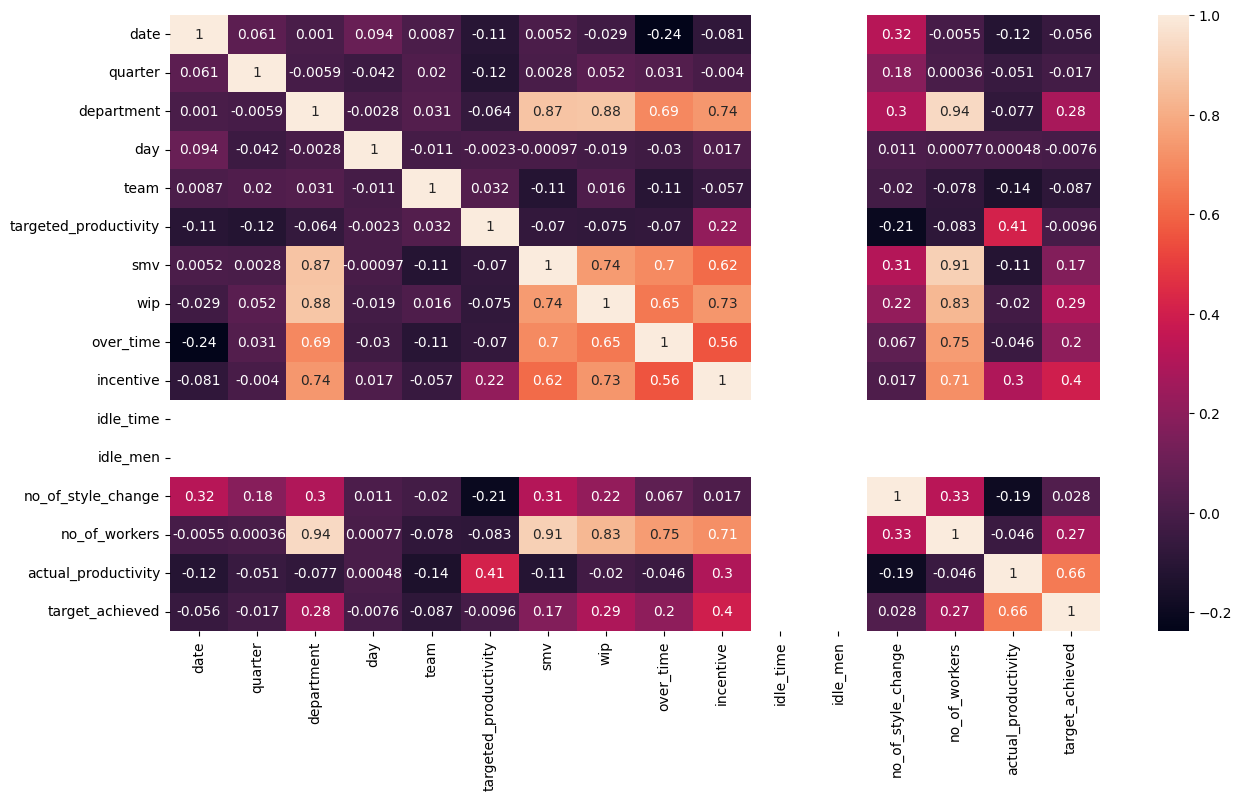

In [ ]:

#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(label_encoded.corr(),annot=True)
plt.show()

idle_time dan idle_men tidak terdapat tampilan karena efek dari penghapusan outliers sebelumnya, yang menyebabkan beberapa idle_time dan juga idle_men yang memiliki outliers terhapuas

## Membuat Model

In [ ]:
import scipy as sp
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler

In [ ]:
label_encoded.drop(columns=['date'], inplace=True, axis=1)

In [ ]:
print(label_encoded.columns)

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'target_achieved'],
      dtype='object')


In [ ]:
#membagi menjadi label dan feature

X = label_encoded.drop(columns='actual_productivity')
y = label_encoded['actual_productivity']

print("Label shape:")
print(y.shape)

print("Features shape:")
print(X.shape)

Label shape:
(1158,)
Features shape:
(1158, 14)


### Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

### scalling data

In [ ]:
# scale features with minmax
scaler = MinMaxScaler()
model=scaler.fit(X_train)
X_train_MinMax=model.transform(X_train)
X_test_MinMax = scaler.transform(X_test)

In [ ]:
# scale features with minmax
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_combined = np.concatenate((X_train_MinMax, X_test_MinMax), axis=0)


## Linear Regresion

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_model = grid_search.best_estimator_
best_model.fit(X_train_sc, y_train)

# Memprediksi data uji
y_pred = best_model.predict(X_test_sc)

# Evaluasi model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

# Menghitung SMAPE
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_value_lr = smape(y_test, y_pred)

print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}")
print('Root Mean Squared Error:', rmse_lr)
print(f"SMAPE: {smape_value_lr}")

# Menampilkan koefisien regresi
coefficients = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Evaluasi menggunakan cross-validation
cv_scores = cross_val_score(best_model, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse}")


Mean Squared Error: 0.007819774846541186
R^2 Score: 0.737821223157053
Root Mean Squared Error: 0.08842949081918987
SMAPE: 10.420122778148302
                        Coefficient
quarter               -1.543751e-04
department            -1.027403e-01
day                   -1.407660e-03
team                  -8.922008e-03
targeted_productivity  5.631024e-02
smv                   -9.424123e-03
wip                   -1.879602e-03
over_time             -1.600693e-02
incentive              4.619734e-02
idle_time             -5.551115e-17
idle_men              -4.943962e-17
no_of_style_change    -6.902300e-03
no_of_workers          5.607323e-02
target_achieved        1.136160e-01
Cross-Validation Mean Squared Error: 0.00911330066512652


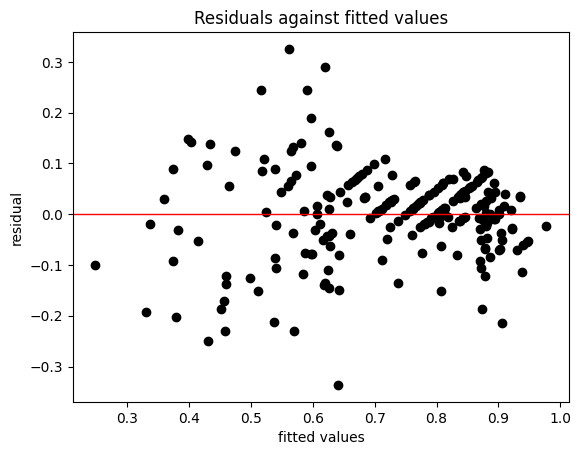

In [ ]:
residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()

**Evaluasi**

Model regresi linear yang telah dilatih menunjukkan hasil evaluasi yang cukup baik. Mean Squared Error (MSE) sebesar 0.0078 mengindikasikan bahwa rata-rata kuadrat kesalahan prediksi model relatif kecil. R^2 score sebesar 0.738 menunjukkan bahwa model dapat menjelaskan sekitar 73.8% variabilitas data, yang merupakan indikator kuat dari kecocokan model terhadap data. Selain itu, nilai SMAPE (Symmetric Mean Absolute Percentage Error) sebesar 10.42% menunjukkan bahwa rata-rata kesalahan prediksi model adalah sekitar 10.42% dari nilai aktual, yang mengindikasikan tingkat akurasi yang baik. Analisis koefisien regresi menunjukkan kontribusi masing-masing variabel independen terhadap prediksi, dengan koefisien negatif dan positif menandakan hubungan negatif dan positif terhadap variabel dependen. Hasil Cross-Validation Mean Squared Error (CV MSE) sebesar 0.0091 menegaskan performa prediksi yang konsisten pada data yang berbeda. Plot residual menunjukkan bahwa residuals tersebar di sekitar garis nol, meskipun ada beberapa pola yang mungkin menunjukkan bahwa model belum sepenuhnya menangkap hubungan dalam data atau adanya heteroskedastisitas. Secara keseluruhan, model ini menunjukkan performa yang cukup baik, meskipun analisis lebih lanjut dan penyesuaian model mungkin diperlukan untuk peningkatan lebih lanjut.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': np.arange(3, 15, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_sc, y_train)

# mengetahui parameter terbaik
print(grid_search.best_estimator_)
# Memprediksi data uji
y_pred = best_knn.predict(X_test_sc)

# Evaluasi model
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred)
smape_knn = smape(y_test, y_pred)

print('Mean Squared Error:', mse_knn)
print('Root Mean Squared Error:', rmse_knn)
print('R^2 Score:', r2_knn)
print('SMAPE:', smape_knn)

# Evaluasi menggunakan cross-validation
cv_scores_knn = cross_val_score(best_knn, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_knn = -cv_scores_knn.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_knn}")

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=9,
                    weights='distance')
Mean Squared Error: 0.007574625937200556
Root Mean Squared Error: 0.08703232696648157
R^2 Score: 0.7460404932072306
SMAPE: 9.375407863937339
Cross-Validation Mean Squared Error: 0.007841103382999749


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_dtr = grid_search.best_estimator_
best_dtr.fit(X_train_sc, y_train)

# Memprediksi data uji
y_pred = best_dtr.predict(X_test_sc)

# Evaluasi model
mse_dtr = mean_squared_error(y_test, y_pred)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred)
smape_dtr = smape(y_test, y_pred)

print('Mean Squared Error:', mse_dtr)
print('Root Mean Squared Error:', rmse_dtr)
print('R^2 Score:', r2_dtr)
print('SMAPE:', smape_dtr)

# Evaluasi menggunakan cross-validation
cv_scores_dtr = cross_val_score(best_dtr, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_dtr = -cv_scores_dtr.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_dtr}")

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Mean Squared Error: 0.007618596558561215
Root Mean Squared Error: 0.08728457228262744
R^2 Score: 0.7445662610264332
SMAPE: 8.687358177712449
Cross-Validation Mean Squared Error: 0.008171090859326498


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(criterion='poisson', max_depth=50, max_features='auto',
                      min_samples_leaf=5, min_samples_split=20,
                      splitter='random')


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter tuning dengan GridSearchCV
param_grid ={
  'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [20,40,60,80,100]
  }


rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_rfr = grid_search.best_estimator_
best_rfr.fit(X_train_sc, y_train)

# mengetahui mana paremeter terbaik
print(grid_search.best_estimator_)
# Memprediksi data uji
y_pred = best_rfr.predict(X_test_sc)

# Evaluasi model
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)
smape_rfr = smape(y_test, y_pred)

print('Mean Squared Error:', mse_rfr)
print('Root Mean Squared Error:', rmse_rfr)
print('R^2 Score:', r2_rfr)
print('SMAPE:', smape_rfr)

# Evaluasi menggunakan cross-validation
cv_scores_rfr = cross_val_score(best_rfr, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_rfr = -cv_scores_rfr.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_rfr}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomForestRegressor(max_depth=90, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5)
Mean Squared Error: 0.005963597426860766
Root Mean Squared Error: 0.07722433183175342
R^2 Score: 0.800054514402077
SMAPE: 7.836592576625131


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Cross-Validation Mean Squared Error: 0.006586847230046296


In [ ]:
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'sqrt']
}

rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# mengetahui mana paremeter terbaik
print(grid_search.best_estimator_)
# Melatih model terbaik
best_rfr = grid_search.best_estimator_
best_rfr.fit(X_train_sc, y_train)

# Memprediksi data uji
y_pred = best_rfr.predict(X_test_sc)

# Evaluasi model
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)
smape_rfr = smape(y_test, y_pred)

print('Mean Squared Error:', mse_rfr)
print('Root Mean Squared Error:', rmse_rfr)
print('R^2 Score:', r2_rfr)
print('SMAPE:', smape_rfr)

# Evaluasi menggunakan cross-validation
cv_scores_rfr = cross_val_score(best_rfr, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_rfr = -cv_scores_rfr.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_rfr}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=5,
                      min_samples_split=10)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 0.005890670945072499
Root Mean Squared Error: 0.07675070647930544
R^2 Score: 0.8024995689170626
SMAPE: 7.768436776729368


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Cross-Validation Mean Squared Error: 0.006431547129045286


## SVM RBF

In [ ]:
from sklearn.svm import SVR
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto']
}

svr_rbf = SVR(kernel='rbf')
grid_search = GridSearchCV(svr_rbf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_svr_rbf = grid_search.best_estimator_
best_svr_rbf.fit(X_train_sc, y_train)

print(grid_search.best_estimator_)
# Memprediksi data uji
y_pred = best_svr_rbf.predict(X_test_sc)

# Evaluasi model
mse_svr_rbf = mean_squared_error(y_test, y_pred)
rmse_svr_rbf = np.sqrt(mse_svr_rbf)
r2_svr_rbf = r2_score(y_test, y_pred)
smape_svr_rbf = smape(y_test, y_pred)

print('Mean Squared Error:', mse_svr_rbf)
print('Root Mean Squared Error:', rmse_svr_rbf)
print('R^2 Score:', r2_svr_rbf)
print('SMAPE:', smape_svr_rbf)

# Evaluasi menggunakan cross-validation
cv_scores_svr_rbf = cross_val_score(best_svr_rbf, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_svr_rbf = -cv_scores_svr_rbf.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_svr_rbf}")

SVR(C=1, epsilon=0.01, gamma='auto')
Mean Squared Error: 0.006025789623319801
Root Mean Squared Error: 0.07762595972559568
R^2 Score: 0.7979693553895999
SMAPE: 8.157346248398978
Cross-Validation Mean Squared Error: 0.007266586057456392


## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPRegressor(max_iter=100)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Melatih model terbaik
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train_sc, y_train)

# Memprediksi data uji
y_pred = best_mlp.predict(X_test_sc)

# Evaluasi model
mse_mlp = mean_squared_error(y_test, y_pred)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred)
smape_mlp = smape(y_test, y_pred)

print('Mean Squared Error:', mse_mlp)
print('Root Mean Squared Error:', rmse_mlp)
print('R^2 Score:', r2_mlp)
print('SMAPE:', smape_mlp)

# Evaluasi menggunakan cross-validation
cv_scores_mlp = cross_val_score(best_mlp, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_mlp = -cv_scores_mlp.mean()

print(f"Cross-Validation Mean Squared Error: {mean_cv_mse_mlp}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean Squared Error: 0.006862698207127687
Root Mean Squared Error: 0.08284140394227808
R^2 Score: 0.7699097663172666
SMAPE: 9.348761951270696
Cross-Validation Mean Squared Error: 0.0081577959022956


## Perbandingan

In [ ]:
# Hasil evaluasi dari berbagai model
results = [
    ['Linear Regression', mse_lr, rmse_lr, r2_lr, smape_value_lr],
    ['KNN', mse_knn, rmse_knn, r2_knn, smape_knn],
    ['Decision Tree', mse_dtr, rmse_dtr, r2_dtr, smape_dtr],
    ['Random Forest', mse_rfr, rmse_rfr, r2_rfr, smape_rfr],
    ['SVM RBF', mse_svr_rbf, rmse_svr_rbf, r2_svr_rbf, smape_svr_rbf],
    ['MLP', mse_mlp, rmse_mlp, r2_mlp, smape_mlp]
]

# Membuat dataframe
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R^2', 'SMAPE'])

# Menampilkan dataframe
print(results_df)

               Model       MSE      RMSE       R^2      SMAPE
0  Linear Regression  0.007820  0.088429  0.737821  10.420123
1                KNN  0.007575  0.087032  0.746040   9.375408
2      Decision Tree  0.007619  0.087285  0.744566   8.687358
3      Random Forest  0.005891  0.076751  0.802500   7.768437
4            SVM RBF  0.006026  0.077626  0.797969   8.157346
5                MLP  0.006863  0.082841  0.769910   9.348762


## Importance Feature

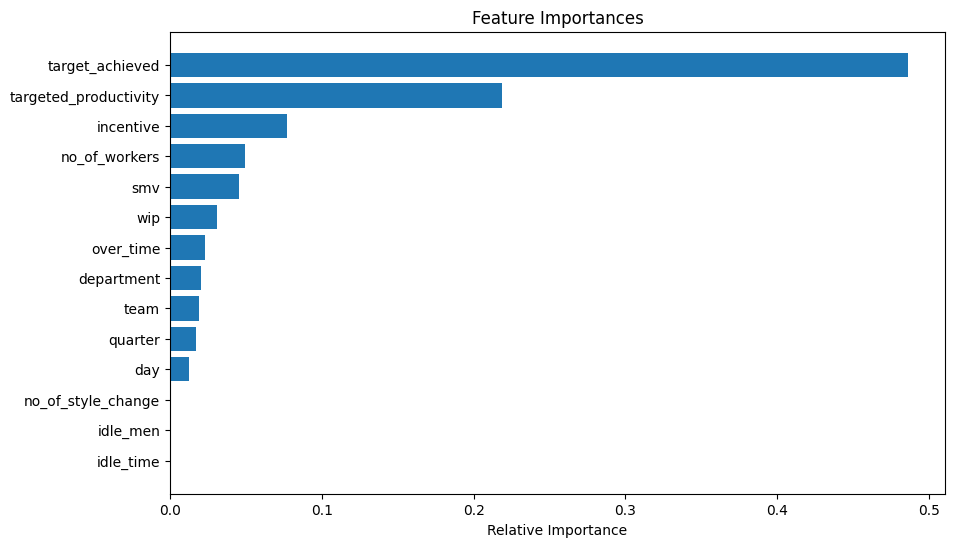

In [ ]:
# Feature importance
importances = best_rfr.feature_importances_
indices = np.argsort(importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Analysis

Fitur Target Achieved dan Targeted Productivity sangat penting dalam memprediksi produktivitas aktual pekerja. Hal ini menunjukkan bahwa pencapaian target dan produktivitas yang ditargetkan adalah indikator utama dalam menentukan kinerja pekerja. Selain itu, insentif yang diberikan kepada pekerja juga memainkan peran penting dalam meningkatkan produktivitas mereka. Jumlah pekerja (No. of Workers) dan Standard Minute Value (SMV), yang merupakan waktu yang dialokasikan untuk menyelesaikan tugas tertentu, juga merupakan faktor penting lainnya yang mempengaruhi produktivitas pekerja.

# Recomendation

Berdasarkan analisis feature importance, terdapat beberapa rekomendasi untuk meningkatkan produktivitas pekerja. Pertama, pengaturan target yang realistis sangat penting mengingat Targeted Productivity memiliki pengaruh besar. Pastikan target yang ditetapkan realistis dan dapat dicapai oleh pekerja. Kedua, pemberian insentif yang optimal dapat meningkatkan motivasi pekerja dan produktivitas mereka. Ketiga, optimasi jumlah pekerja sangat diperlukan, yakni menyesuaikan jumlah pekerja yang tepat untuk setiap tim dan tugas guna meningkatkan efisiensi dan produktivitas. Terakhir, menyediakan pelatihan dan pengembangan yang tepat untuk meningkatkan keterampilan pekerja sesuai dengan Standard Minute Value (SMV) yang ditetapkan.

# Recommend to Improve

In [ ]:
def recommend_improvements(data):
    recommendations = []

    for index, row in data.iterrows():
        rec = {}
        if row['actual_productivity'] < row['targeted_productivity']:
            rec['Adjust Target'] = "Consider adjusting the target for team {}.".format(row['team'])

        if row['incentive'] < data['incentive'].mean():
            rec['Increase Incentive'] = "Increase incentive for team {} to boost productivity.".format(row['team'])

        if row['no_of_workers'] < data['no_of_workers'].mean():
            rec['Increase Workers'] = "Consider adding more workers to team {}.".format(row['team'])

        recommendations.append(rec)

    return recommendations

# Example usage
recommendations = recommend_improvements(data)
for i, rec in enumerate(recommendations):
    print("Recommendations for row {}:".format(i))
    for key, value in rec.items():
        print("  - {}: {}".format(key, value))
    print("\n")


Streaming output truncated to the last 5000 lines.
  - Increase Incentive: Increase incentive for team 2 to boost productivity.
  - Increase Workers: Consider adding more workers to team 2.


Recommendations for row 68:


Recommendations for row 69:
  - Increase Incentive: Increase incentive for team 8 to boost productivity.


Recommendations for row 70:


Recommendations for row 71:


Recommendations for row 72:
  - Increase Workers: Consider adding more workers to team 6.


Recommendations for row 73:
  - Increase Workers: Consider adding more workers to team 12.


Recommendations for row 74:


Recommendations for row 75:


Recommendations for row 76:
  - Increase Incentive: Increase incentive for team 10 to boost productivity.
  - Increase Workers: Consider adding more workers to team 10.


Recommendations for row 77:
  - Increase Incentive: Increase incentive for team 5 to boost productivity.
  - Increase Workers: Consider adding more workers to team 5.


Recommendations for row 78

In [ ]:
def recommend_improvements(data):
    recommendations = []

    for index, row in label_encoded.iterrows():
        rec = {}
        if row['actual_productivity'] < row['targeted_productivity']:
            rec['Adjust Target'] = "Consider adjusting the target for team {}.".format(row['team'])

        if row['incentive'] < label_encoded['incentive'].mean():
            rec['Increase Incentive'] = "Increase incentive for team {} to boost productivity.".format(row['team'])

        if row['no_of_workers'] < label_encoded['no_of_workers'].mean():
            rec['Increase Workers'] = "Consider adding more workers to team {}.".format(row['team'])

        recommendations.append(rec)

    return recommendations

# Example usage
recommendations = recommend_improvements(data)
for i, rec in enumerate(recommendations):
    print("Recommendations for row {}:".format(i))
    for key, value in rec.items():
        print("  - {}: {}".format(key, value))
    print("\n")

Streaming output truncated to the last 5000 lines.
  - Increase Workers: Consider adding more workers to team 12.0.


Recommendations for row 4:


Recommendations for row 5:


Recommendations for row 6:
  - Increase Incentive: Increase incentive for team 2.0 to boost productivity.
  - Increase Workers: Consider adding more workers to team 2.0.


Recommendations for row 7:


Recommendations for row 8:


Recommendations for row 9:


Recommendations for row 10:


Recommendations for row 11:
  - Adjust Target: Consider adjusting the target for team 10.0.


Recommendations for row 12:
  - Adjust Target: Consider adjusting the target for team 5.0.
  - Increase Workers: Consider adding more workers to team 5.0.


Recommendations for row 13:
  - Increase Incentive: Increase incentive for team 10.0 to boost productivity.
  - Increase Workers: Consider adding more workers to team 10.0.


Recommendations for row 14:
  - Adjust Target: Consider adjusting the target for team 8.0.
  - Increase Incen